In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_edges': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 '_errors': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. Other kwargs are included in the metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num")
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In the terminal, the `__repr__` prints out bin counts and errors.

In [4]:
print((num/den).rebin(3))

[1.423 ± 0.560   1.179 ± 0.321   1.526 ± 0.216   1.517 ± 0.153
 1.487 ± 0.121   1.513 ± 0.127   1.610 ± 0.147   1.322 ± 0.192
 1.243 ± 0.322   1.400 ± 0.632]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [5]:
num

[5.000 ± 2.236   2.000 ± 1.414   3.000 ± 1.732   5.000 ± 2.236
 6.000 ± 2.449   9.000 ± 3.000   11.000 ± 3.317   34.000 ± 5.831
 41.000 ± 6.403   38.000 ± 6.164   53.000 ± 7.280   61.000 ± 7.810
 73.000 ± 8.544   79.000 ± 8.888   76.000 ± 8.718   86.000 ± 9.274
 69.000 ± 8.307   62.000 ± 7.874   62.000 ± 7.874   65.000 ± 8.062
 59.000 ± 7.681   31.000 ± 5.568   25.000 ± 5.000   15.000 ± 3.873
 10.000 ± 3.162   9.000 ± 3.000   3.000 ± 1.732   5.000 ± 2.236
 2.000 ± 1.414   1.000 ± 1.000]

Or, just explicitly plot it with matplotlib.

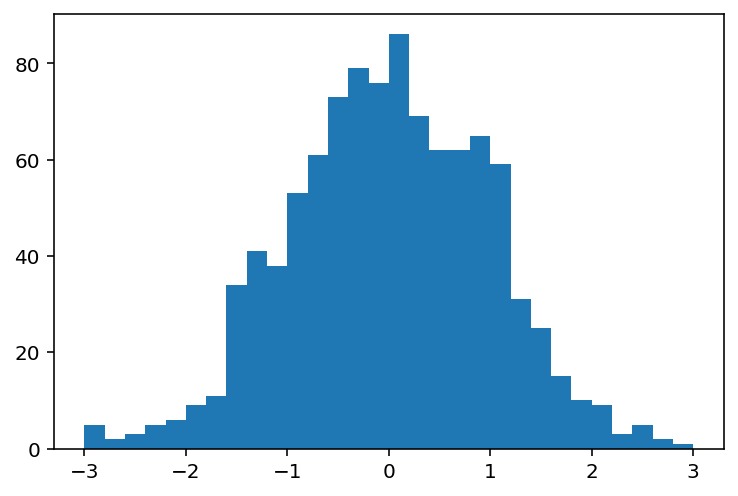

In [6]:
num.plot()

Change the style and show bin counts with some more options.

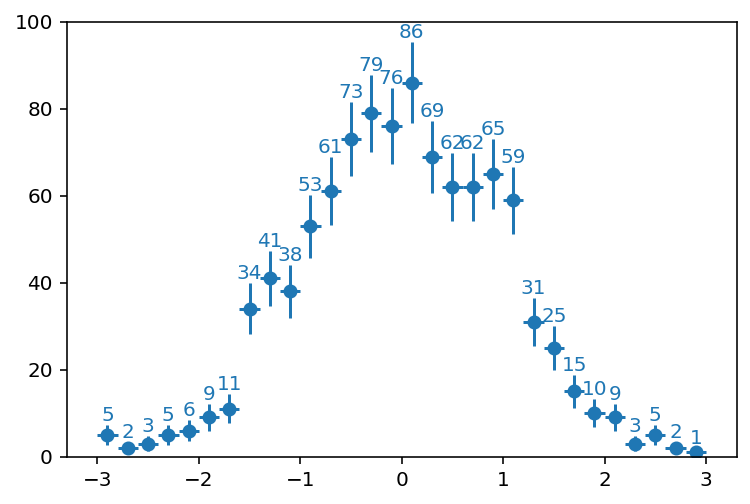

In [7]:
num.plot(show_errors=True,show_counts=True)

Do math with the histograms and merge 3 bins into one

In [8]:
2*(num/den).rebin(3)

[2.845 ± 1.120   2.357 ± 0.642   3.051 ± 0.433   3.034 ± 0.306
 2.974 ± 0.241   3.025 ± 0.254   3.219 ± 0.294   2.643 ± 0.384
 2.486 ± 0.644   2.800 ± 1.263]

Make a more complicated plot with a ratio panel.

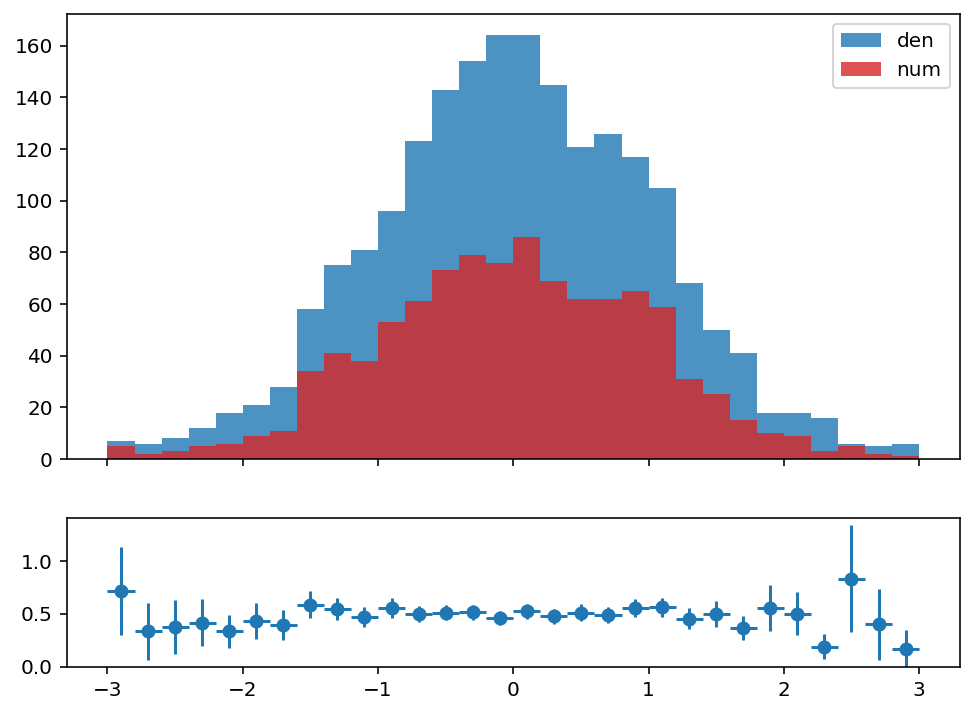

In [9]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True)
ax1.legend()

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [10]:
num.to_json()

'{"_counts": [5.0, 2.0, 3.0, 5.0, 6.0, 9.0, 11.0, 34.0, 41.0, 38.0, 53.0, 61.0, 73.0, 79.0, 76.0, 86.0, 69.0, 62.0, 62.0, 65.0, 59.0, 31.0, 25.0, 15.0, 10.0, 9.0, 3.0, 5.0, 2.0, 1.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [2.23606797749979, 1.4142135623730951, 1.7320508075688772, 2.23606797749979, 2.449489742783178, 3.0, 3.3166247903554, 5.830951894845301, 6.4031242374328485, 6.164414002968976, 7.280109889280518, 7.810249675906654, 8.54400374531753, 8.888194417315589, 8.717797887081348, 9.273618495495704, 8.306623862918075, 7.874007874011811, 7.874007874011811, 8.06225774829855, 7

In [11]:
Hist1D.from_json(num.to_json())

[5.000 ± 2.236   2.000 ± 1.414   3.000 ± 1.732   5.000 ± 2.236
 6.000 ± 2.449   9.000 ± 3.000   11.000 ± 3.317   34.000 ± 5.831
 41.000 ± 6.403   38.000 ± 6.164   53.000 ± 7.280   61.000 ± 7.810
 73.000 ± 8.544   79.000 ± 8.888   76.000 ± 8.718   86.000 ± 9.274
 69.000 ± 8.307   62.000 ± 7.874   62.000 ± 7.874   65.000 ± 8.062
 59.000 ± 7.681   31.000 ± 5.568   25.000 ± 5.000   15.000 ± 3.873
 10.000 ± 3.162   9.000 ± 3.000   3.000 ± 1.732   5.000 ± 2.236
 2.000 ± 1.414   1.000 ± 1.000]

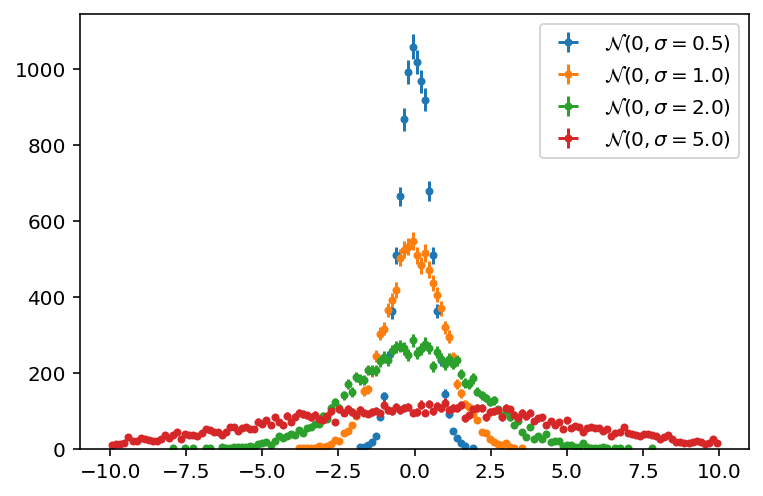

In [12]:
[
    Hist1D(
        np.random.normal(0,sigma,10000),
        bins=np.linspace(-10,10,151),
        label=r"$\mathcal{{N}}(0,\sigma={:.1f})$".format(sigma),
        overflow=False,
    ).plot(show_errors=True,markersize=3.0).legend() for sigma in [0.5,1,2,5]
];